In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [75]:
data['sum'] = 1
data.metroscubiertos.describe()

count    222600.000000
mean        174.016774
std          98.152950
min          15.000000
25%          90.000000
50%         153.000000
75%         240.000000
max         439.000000
Name: metroscubiertos, dtype: float64

In [74]:
#data.dropna(subset={'metroscubiertos'},inplace=True)
#data.metrostotales.fillna(value=data.metroscubiertos,inplace=True)
data.metrostotales.describe()

count    188533.000000
mean        176.765145
std          94.427328
min          15.000000
25%         102.000000
50%         155.000000
75%         238.000000
max         439.000000
Name: metrostotales, dtype: float64

In [70]:
data.loc[data.metrostotales>350, 'rango_superficie'] = '+350'
data.loc[((data.metrostotales>300) & (data.metrostotales<351)), 'rango_superficie'] = '300-350'
data.loc[((data.metrostotales>250) & (data.metrostotales<301)), 'rango_superficie'] = '250-300'
data.loc[((data.metrostotales>200) & (data.metrostotales<251)), 'rango_superficie'] = '200-250'
data.loc[((data.metrostotales>150) & (data.metrostotales<201)), 'rango_superficie'] = '150-200'
data.loc[((data.metrostotales>100) & (data.metrostotales<151)), 'rango_superficie'] = '100-150'
data.loc[((data.metrostotales>50) & (data.metrostotales<101)), 'rango_superficie'] = '50-100'
data.loc[data.metrostotales<50, 'rango_superficie'] = '-50'

In [71]:
data.loc[data.precio>10000000, 'rango_precio'] = '+10000000'
data.loc[((data.precio>9000000) & (data.precio<10000001)), 'rango_precio'] = '9000000-1000000'
data.loc[((data.precio>8000000) & (data.precio<9000001)), 'rango_precio'] = '8000000-9000000'
data.loc[((data.precio>7000000) & (data.precio<8000001)), 'rango_precio'] = '7000000-8000000'
data.loc[((data.precio>6000000) & (data.precio<7000001)), 'rango_precio'] = '6000000-7000000'
data.loc[((data.precio>5000000) & (data.precio<6000001)), 'rango_precio'] = '5000000-6000000'
data.loc[((data.precio>4000000) & (data.precio<5000001)), 'rango_precio'] = '4000000-5000000'
data.loc[((data.precio>3000000) & (data.precio<4000001)), 'rango_precio'] = '3000000-4000000'
data.loc[((data.precio>2000000) & (data.precio<3000001)), 'rango_precio'] = '2000000-3000000'
data.loc[((data.precio>1000000) & (data.precio<2000001)), 'rango_precio'] = '1000000-2000000'
data.loc[((data.precio<1000001)), 'rango_precio'] = '-1000000'

Text(0, 0.5, 'Promedio de metros')

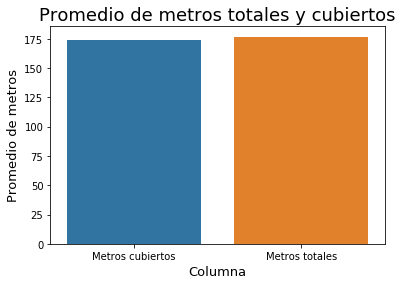

In [73]:
d = {'tipo': ['Metros cubiertos','Metros totales'], 'promedio': [data.metroscubiertos.mean(),data.metrostotales.mean()]}
mts = pd.DataFrame(data=d)
g = sns.barplot(x = "tipo", y = "promedio", data = mts)
g.set_title("Promedio de metros totales y cubiertos", fontsize=18)
g.set_xlabel("Columna", fontsize=13)
g.set_ylabel("Promedio de metros",fontsize=13 )

Text(0, 0.5, 'Precio promedio (en miles de pesos mexicanos)')

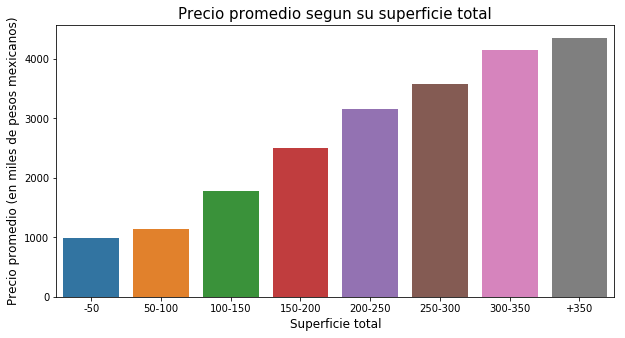

In [87]:
precio_sup = data.groupby('rango_superficie').agg({'precio':'mean'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
precio_sup = precio_sup.reindex(new_idx)
precio_sup.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = precio_sup['rango_superficie'], y= precio_sup['precio']/1000) 
g.set_title("Precio promedio segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Precio promedio (en miles de pesos mexicanos)", fontsize=12)

In [61]:
rgsup_vs_rgprecio = data.groupby(['rango_superficie','rango_precio']).agg({'sum':'sum'})
new_idx_prec = ['-1000000','1000000-2000000','2000000-3000000','3000000','4000000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000-9000000','9000000-10000000','+10000000']
new_idx_sup = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
rgsup_vs_rgprecio = rgsup_vs_rgprecio.reindex(new_idx_prec,level=1)
rgsup_vs_rgprecio = rgsup_vs_rgprecio.unstack()
rgsup_vs_rgprecio = rgsup_vs_rgprecio.reindex(new_idx_sup)
rgsup_vs_rgprecio = rgsup_vs_rgprecio.applymap(lambda x: np.log(x))
rgsup_vs_rgprecio.columns = rgsup_vs_rgprecio.columns.droplevel()

Text(69.0, 0.5, 'Rango de superficie')

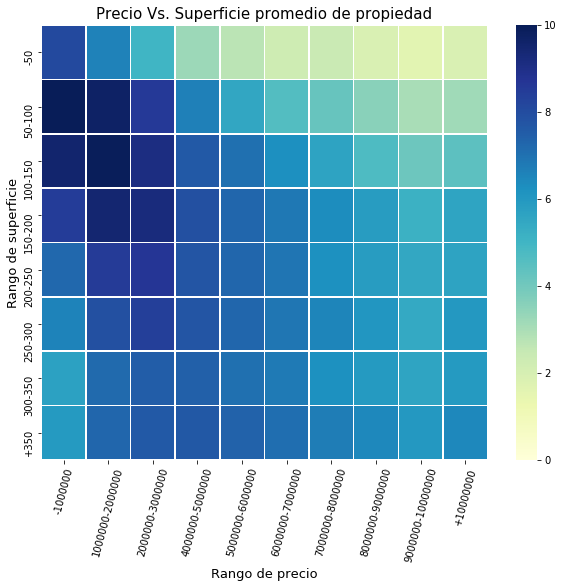

In [47]:
plt.figure(figsize=(10,8))
g = sns.heatmap(rgsup_vs_rgprecio, vmin = 0, vmax=10, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Precio Vs. Superficie promedio de propiedad", fontsize=15)
g.set_xlabel("Rango de precio", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [11]:
ciudades = (data.ciudad.value_counts()>2500)
ciudades = (ciudades[ciudades==True]).index

data_ciudad = data.loc[data.ciudad.isin(ciudades)]
sup_vs_ciudad = data_ciudad.groupby(['rango_superficie','ciudad']).agg({'sum':'sum'}).unstack()

In [12]:
sup_vs_ciudad = sup_vs_ciudad.applymap(lambda x: np.log(x))

Text(69.0, 0.5, 'Rango de superficie')

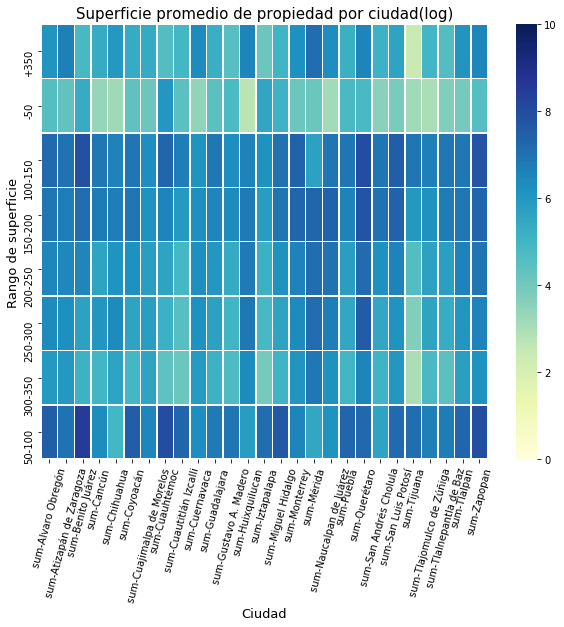

In [22]:
plt.figure(figsize=(10,8))
g = sns.heatmap(sup_vs_ciudad, vmin = 0, vmax=10, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Superficie promedio de propiedad por ciudad(log)", fontsize=15)
g.set_xlabel("Ciudad", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)
#FALTA ORDENAR EL INDICE VERTICAL

Text(0, 0.5, 'Cantidad de propiedades publicadas')

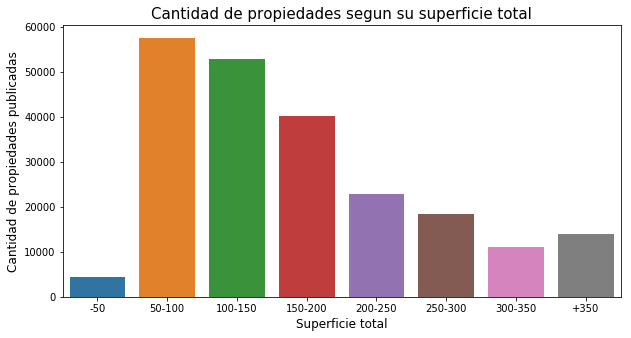

In [14]:
sup = data.groupby('rango_superficie').agg({'sum':'sum'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup = sup.reindex(new_idx)
sup.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = sup['rango_superficie'], y= sup['sum']) 
g.set_title("Cantidad de propiedades segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Cantidad de propiedades publicadas", fontsize=12)

In [52]:
data_habitaciones = data.dropna(subset=['habitaciones','garages','banos'])
data_habitaciones = data_habitaciones[['rango_superficie','habitaciones','garages','banos']]
data_habitaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176464 entries, 0 to 239999
Data columns (total 4 columns):
rango_superficie    175197 non-null object
habitaciones        176464 non-null float32
garages             176464 non-null float32
banos               176464 non-null float64
dtypes: float32(2), float64(1), object(1)
memory usage: 5.4+ MB


In [80]:
data_habitaciones = data_habitaciones.groupby('rango_superficie').agg({'habitaciones':'mean','garages':'mean','banos':'mean'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
data_habitaciones = data_habitaciones.reindex(new_idx)
data_habitaciones

,habitaciones,garages,banos
rango_superficie,,,
-50,1.949185,0.785235,1.136785
50-100,2.367810,1.192176,1.437543
100-150,2.863443,1.656474,1.997352
150-200,3.057237,1.875894,2.360857
200-250,3.155497,2.019445,2.620503
250-300,3.199053,2.125459,2.817202
300-350,3.215856,2.174512,2.915454
+350,3.276652,2.150969,2.942185


Text(0, 0.5, 'Cantidad de habitaciones')

<Figure size 1440x576 with 0 Axes>

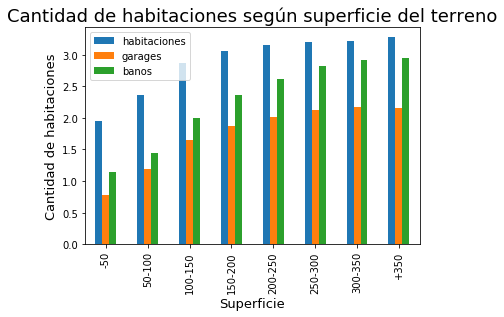

In [85]:
plt.figure(figsize=(20,8))

x = data_habitaciones.plot(kind='bar')
x.set_title("Cantidad de habitaciones según superficie del terreno", fontsize=18)
x.set_xlabel("Superficie", fontsize=13)
x.set_ylabel("Cantidad de habitaciones", fontsize=13)

Text(0, 0.5, 'Promedio de habitaciones')

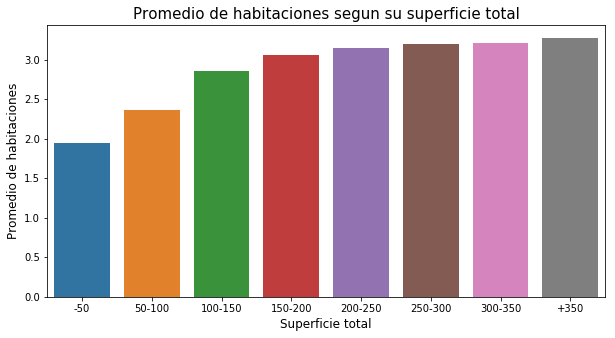

In [54]:
habit = data_habitaciones['habitaciones'].reset_index()
plt.figure(figsize = (10,5))
g = sns.barplot(x = habit['rango_superficie'], y= habit['habitaciones']) 
g.set_title("Promedio de habitaciones segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Promedio de habitaciones", fontsize=12)

Text(0, 0.5, 'Promedio de baños')

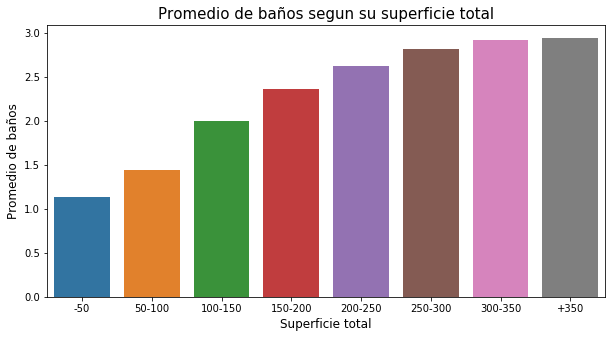

In [55]:
banos = data_habitaciones['banos'].reset_index()
plt.figure(figsize = (10,5))
g = sns.barplot(x = banos['rango_superficie'], y= banos['banos']) 
g.set_title("Promedio de baños segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Promedio de baños", fontsize=12)

Text(0, 0.5, 'Promedio de garages')

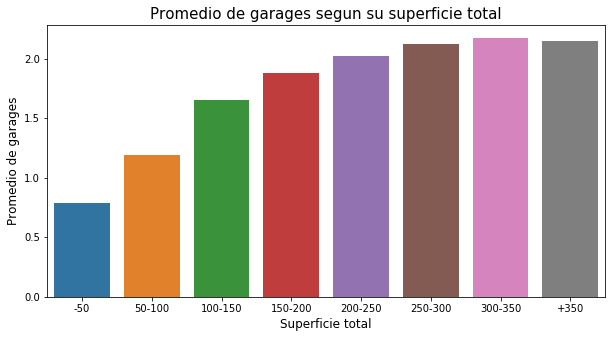

In [77]:
garages = data_habitaciones['garages'].reset_index()
plt.figure(figsize = (10,5))
g = sns.barplot(x = garages['rango_superficie'], y= garages['garages']) 
g.set_title("Promedio de garages segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Promedio de garages", fontsize=12)

Text(69.0, 0.5, 'Rango de superficie')

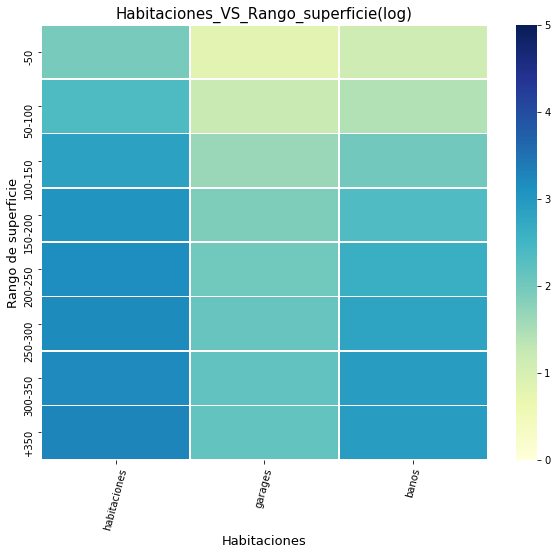

In [56]:
plt.figure(figsize=(10,8))
g = sns.heatmap(data_habitaciones, vmin = 0, vmax=5, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Habitaciones_VS_Rango_superficie(log)", fontsize=15)
g.set_xlabel("Habitaciones", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [7]:
mex_df = data[data['provincia'].isin(['Distrito Federal'])]
mex_df.provincia.value_counts()

Distrito Federal    55852
Name: provincia, dtype: int64

Text(0, 0.5, 'Cantidad de propiedades publicadas')

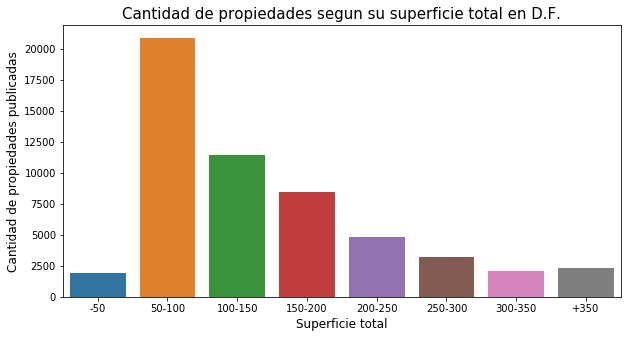

In [9]:
sup_df = mex_df.groupby('rango_superficie').agg({'sum':'sum'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup_df = sup_df.reindex(new_idx)
sup_df.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = sup_df['rango_superficie'], y= sup_df['sum']) 
g.set_title("Cantidad de propiedades segun su superficie total en D.F.", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Cantidad de propiedades publicadas", fontsize=12)


In [41]:
sup_vs_precio = mex_df.groupby(['rango_superficie','rango_precio']).agg({'sum':'sum'})
new_idx_df = ['-1000000','1000000-2000000','2000000-3000000','3000000','4000000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000-9000000','9000000-10000000','+10000000']
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup_vs_precio = sup_vs_precio.reindex(new_idx_df,level=1)
sup_vs_precio = sup_vs_precio.unstack()
sup_vs_precio = sup_vs_precio.reindex(new_idx)
sup_vs_precio = sup_vs_precio.applymap(lambda x: np.log(x))
sup_vs_precio.columns = sup_vs_precio.columns.droplevel()
sup_vs_precio

rango_precio,-1000000,1000000-2000000,2000000-3000000,4000000-5000000,5000000-6000000,6000000-7000000,7000000-8000000,8000000-9000000,9000000-10000000,+10000000
rango_superficie,,,,,,,,,,
-50,7.249215,6.033086,4.189655,2.302585,2.302585,1.609438,1.386294,0.693147,0.000000,0.000000
50-100,8.596559,9.055906,8.313607,6.467699,5.379897,4.430817,3.951244,3.135494,2.708050,2.302585
100-150,5.700444,7.677400,7.977968,7.360740,6.856462,6.175867,5.517453,4.615121,3.850148,4.219508
150-200,4.844187,6.839476,7.356918,7.183112,6.769642,6.453625,6.115892,5.730100,4.983607,5.517453
200-250,3.891820,5.918894,6.621406,6.620073,6.336826,6.255750,5.680173,5.451038,5.214936,5.407172
250-300,3.332205,5.099866,6.122493,6.086775,5.916202,5.916202,5.659482,5.365976,4.867534,5.648974
300-350,2.890372,4.454347,5.159055,5.652489,5.549076,5.484797,5.342334,5.225747,4.852030,5.375278
+350,2.833213,4.262680,5.159055,5.673323,5.572154,5.552960,5.598422,5.505332,5.010635,5.717028


Text(69.0, 0.5, 'Rango de superficie')

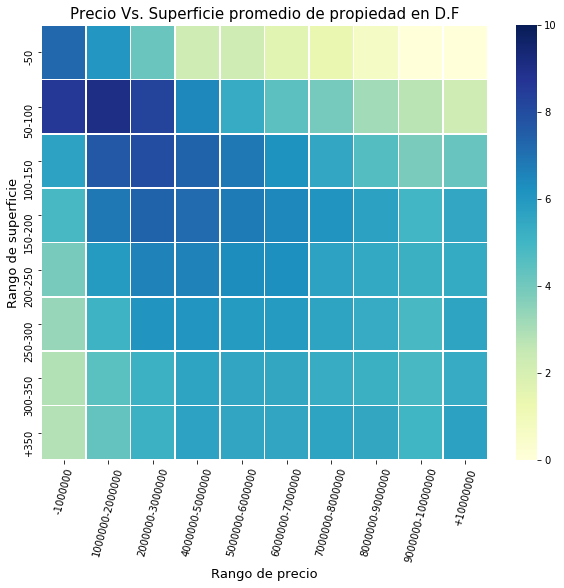

In [42]:
plt.figure(figsize=(10,8))
g = sns.heatmap(sup_vs_precio, vmin = 0, vmax=10, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Precio Vs. Superficie promedio de propiedad en D.F", fontsize=15)
g.set_xlabel("Rango de precio", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [48]:
data_habitaciones = mex_df.groupby('rango_superficie').agg({'habitaciones':'mean','garages':'mean','banos':'mean'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
data_habitaciones = data_habitaciones.reindex(new_idx)
data_habitaciones

,habitaciones,garages,banos
rango_superficie,,,
-50,1.822024,0.552529,1.096317
50-100,2.238076,1.082434,1.457275
100-150,2.780004,1.626101,2.097649
150-200,3.138290,1.844864,2.393695
200-250,3.305185,1.939034,2.564855
250-300,3.344567,1.983002,2.730687
300-350,3.437082,1.933829,2.838090
+350,3.524409,1.844186,2.925081


Text(0, 0.5, 'Cantidad de habitaciones')

<Figure size 720x360 with 0 Axes>

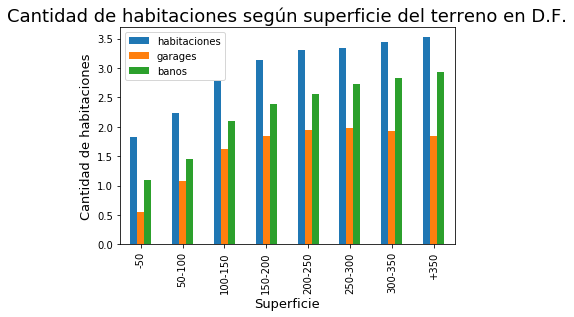

In [51]:
plt.figure(figsize = (10,5))
x = data_habitaciones.plot(kind='bar')
x.set_title("Cantidad de habitaciones según superficie del terreno en D.F.", fontsize=18)
x.set_xlabel("Superficie", fontsize=13)
x.set_ylabel("Cantidad de habitaciones", fontsize=13)

In [ ]:
mex_df.